In [11]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns


This is a collection of visualizations with the purpose of gaining some insights from my Whoop data. First, i retrieved the data from my local database and imported the tables I needed. Then I created a couple of new dataframes in order to graph the data I needed from the tables. I started by plotting percentage of time spent in the various heart rate zones while playing soccer. Then, then I looked at those percentages against each other in a bar chart. After that, I looked at the relationship between resting heart rate, sleep duration, and strain agaist my recovery scores.

In [ ]:
#connnect to mssql server db


conn = (
    'driver={SQL Server Native Client 11.0};'
    'server=laptop-8ceogdtf\sqlexpress;'
    'database=Whoop;'
    'trusted_connection=yes;'
)

cnxn = pyodbc.connect(conn)

cursor = cnxn.cursor()

In [ ]:
#get necessary tables from db

sleeps = "Select * from sleeps;"

sleep_tabledf = pd.read_sql(sleeps, cnxn)


workouts = "Select * from workouts;"

workoutdf = pd.read_sql(workouts, cnxn)


phys_cycles = "Select * from physiological_cycles;"

physdf = pd.read_sql(phys_cycles, cnxn)



C:\Users\andre\AppData\Local\Temp\ipykernel_25132\985075308.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sleep_tabledf = pd.read_sql(sleeps, cnxn)
C:\Users\andre\AppData\Local\Temp\ipykernel_25132\985075308.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  workoutdf = pd.read_sql(workouts, cnxn)
C:\Users\andre\AppData\Local\Temp\ipykernel_25132\985075308.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  physdf = pd.read_sql(phys_cycles, cnxn)


In [ ]:
# create new df for analysis and visualization

soccerHRdf = workoutdf[['activity_name','activity_strain', 'HR_zone1_percent', 'HR_zone2_percent','HR_zone3_percent','HR_zone4_percent','HR_zone5_percent']]

soccerHRdf = soccerHRdf[soccerHRdf['activity_name'] == 'Soccer']

soccerHRdf.head()



,activity_name,activity_strain,HR_zone1_percent,HR_zone2_percent,HR_zone3_percent,HR_zone4_percent,HR_zone5_percent
2,Soccer,14.7,3.0,14.0,21.0,22.0,39.0
3,Soccer,20.1,11.0,12.0,12.0,29.0,35.0
4,Soccer,5.8,8.0,71.0,18.0,0.0,0.0
5,Soccer,16.7,13.0,16.0,25.0,44.0,2.0
7,Soccer,17.8,19.0,28.0,12.0,14.0,24.0


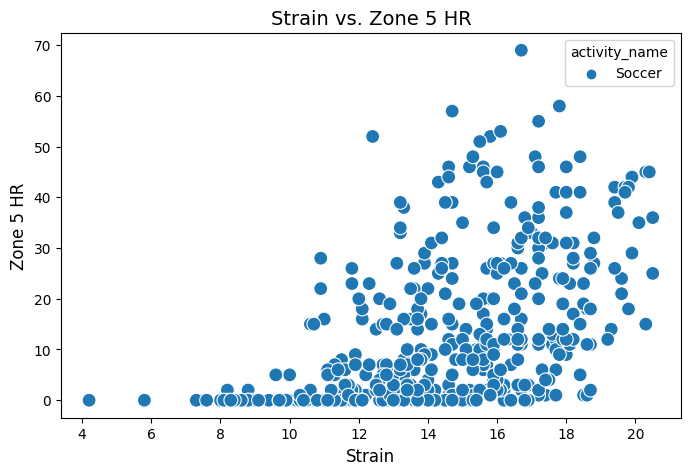

In [ ]:
#graph strain vs zone 5 HR


plt.figure(figsize=(8,5))
sns.scatterplot(x=soccerHRdf['activity_strain'], y=soccerHRdf['HR_zone5_percent'], hue=soccerHRdf['activity_name'], s=100)
plt.title('Strain vs. Zone 5 HR', fontsize=14)
plt.xlabel('Strain', fontsize=12)
plt.ylabel('Zone 5 HR', fontsize=12)
plt.show()


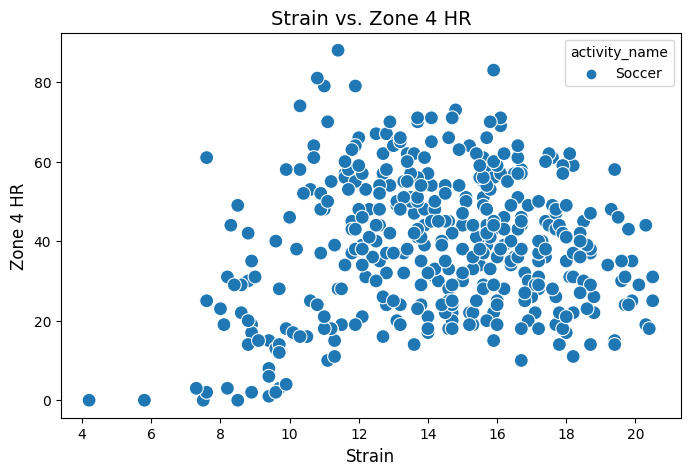

In [ ]:
# graph strain vs zone 4 HR

plt.figure(figsize=(8,5))
sns.scatterplot(x=soccerHRdf['activity_strain'], y=soccerHRdf['HR_zone4_percent'], hue=soccerHRdf['activity_name'], s=100)
plt.title('Strain vs. Zone 4 HR', fontsize=14)
plt.xlabel('Strain', fontsize=12)
plt.ylabel('Zone 4 HR', fontsize=12)
plt.show()

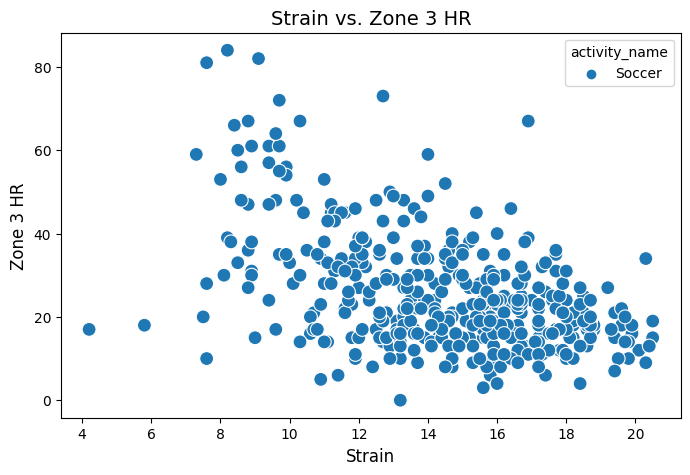

In [ ]:
#strain vs zone 3 HR

plt.figure(figsize=(8,5))
sns.scatterplot(x=soccerHRdf['activity_strain'], y=soccerHRdf['HR_zone3_percent'], hue=soccerHRdf['activity_name'], s=100)
plt.title('Strain vs. Zone 3 HR', fontsize=14)
plt.xlabel('Strain', fontsize=12)
plt.ylabel('Zone 3 HR', fontsize=12)
plt.show()

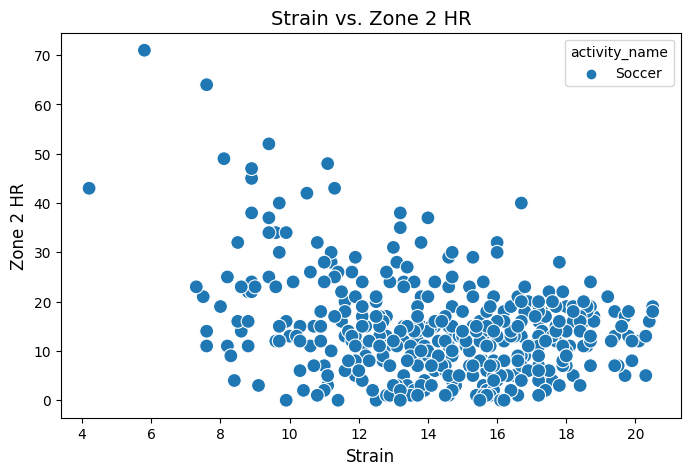

In [ ]:
#strain vs zone 2 HR

plt.figure(figsize=(8,5))
sns.scatterplot(x=soccerHRdf['activity_strain'], y=soccerHRdf['HR_zone2_percent'], hue=soccerHRdf['activity_name'], s=100)
plt.title('Strain vs. Zone 2 HR', fontsize=14)
plt.xlabel('Strain', fontsize=12)
plt.ylabel('Zone 2 HR', fontsize=12)
plt.show()

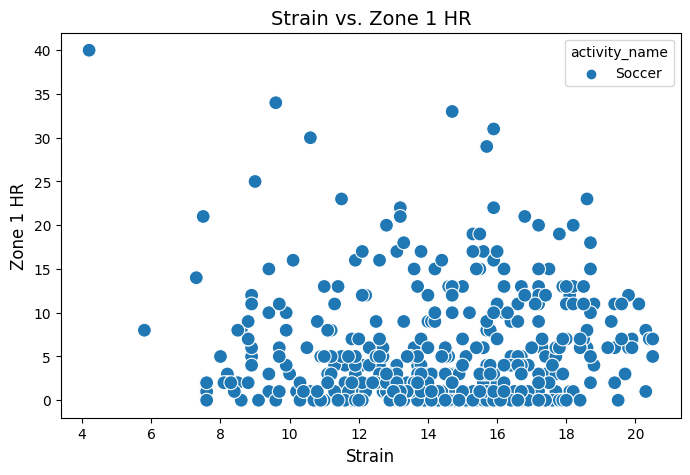

In [ ]:
# strain vs zone 1 HR

plt.figure(figsize=(8,5))
sns.scatterplot(x=soccerHRdf['activity_strain'], y=soccerHRdf['HR_zone1_percent'], hue=soccerHRdf['activity_name'], s=100)
plt.title('Strain vs. Zone 1 HR', fontsize=14)
plt.xlabel('Strain', fontsize=12)
plt.ylabel('Zone 1 HR', fontsize=12)
plt.show()

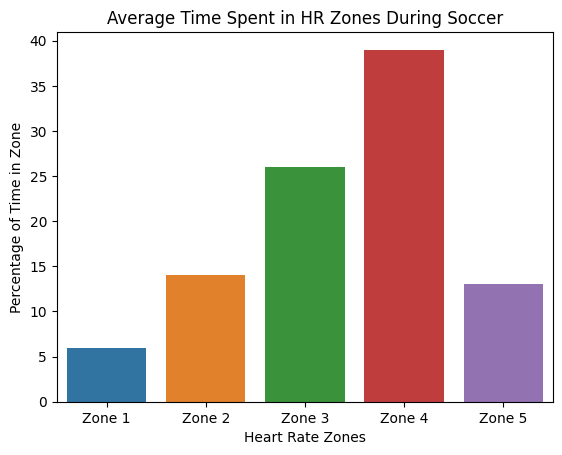

In [ ]:
#create avg df for HR zones

zone1avg = soccerHRdf['HR_zone1_percent'].mean()
zone2avg = soccerHRdf['HR_zone2_percent'].mean()
zone3avg = soccerHRdf['HR_zone3_percent'].mean()
zone4avg = soccerHRdf['HR_zone4_percent'].mean()
zone5avg = soccerHRdf['HR_zone5_percent'].mean()

soccerhravg = {'Zones':['Zone 1', 'Zone 2','Zone 3', 'Zone 4', 'Zone 5'] ,'Averages':[zone1avg, zone2avg, zone3avg, zone4avg, zone5avg]}

HRavgdf = pd.DataFrame(soccerhravg)
HRavgdf = HRavgdf.round()

#bar chart for avg time spent in HR zones

sns.barplot(x=HRavgdf['Zones'],y=HRavgdf['Averages'], data=HRavgdf)
plt.title('Average Time Spent in HR Zones During Soccer')
plt.xlabel('Heart Rate Zones')
plt.ylabel('Percentage of Time in Zone')
plt.show()

Insights:

The charts point to a positive correlation between time spent in zone 4 and 5 and a higher strain. This makes sense as the more time spent with an elevated heart rate, the more calories you are going to burn. During these soccer sessions, most of the time is spent in zone 4. While this is not necessarily abnormal because of the nature of the sport, it could indicate a lack of fitness or a lack of 'game IQ' where positioning and energy conservation would reduce the amount of running needed.

In [47]:
physdf.head()

,cycle_start_time,cycle_end_time,cycle_timezone,recovery_score_percent,resting_heart_rate_bpm,heart_rate_variability_ms,skin_temp_celsius,blood_oxygen_percent,day_strain,energy_burned_cal,...,asleep_duration_min,in_bed_duration_min,light_sleep_duration_min,deep_SWS_duration_min,REM_duration_min,awake_duration_min,sleep_need_min,sleep_debt_min,sleep_efficiency_percent,sleep_consistency_percent
0,2024-04-24 00:00:00,NaT,UTC-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-04-17 00:00:00,2024-04-18 00:00:00,UTC-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-06 22:42:14,2023-11-07 22:42:14,UTC-05:00,57.0,46.0,108.0,33.4,97.60,NaN,NaN,...,294.0,356.0,171.0,59.0,64.0,62.0,635.0,127.0,82.0,52.0
3,2023-11-06 01:40:29,2023-11-06 22:42:14,UTC-05:00,63.0,53.0,110.0,33.3,96.07,16.1,2307.0,...,300.0,347.0,185.0,59.0,56.0,47.0,609.0,123.0,88.0,NaN
4,2023-11-05 02:05:05,2023-11-06 02:40:29,UTC-04:00,41.0,64.0,61.0,33.1,95.46,12.6,2373.0,...,255.0,305.0,129.0,74.0,52.0,50.0,503.0,0.0,84.0,NaN


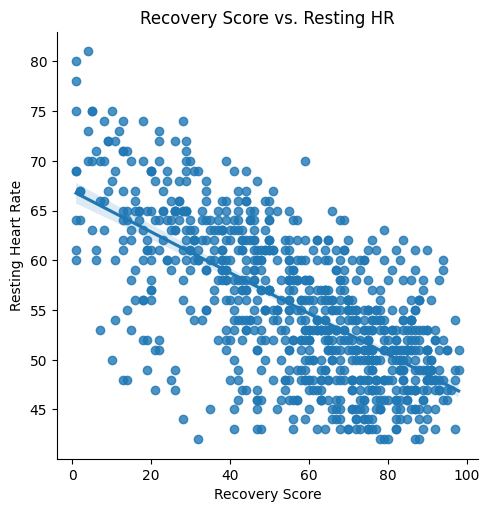

In [ ]:
#recovery score vs resting HR

sns.lmplot(x='recovery_score_percent', y='resting_heart_rate_bpm', data=physdf)
plt.title('Recovery Score vs. Resting HR')
plt.xlabel('Recovery Score')
plt.ylabel('Resting Heart Rate')
plt.show()

Insights:

A higher recovery score has a negavtive correlation with resting HR. The more you are able to recovery, the more efficient your heart is, showing the importance of recovering from exercise.

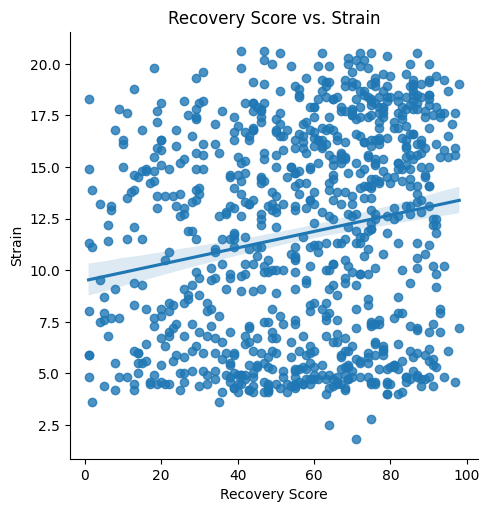

In [ ]:
#recovery score vs previous day strain

sns.lmplot(x='recovery_score_percent', y='day_strain', data=physdf)
plt.title('Recovery Score vs. Strain')
plt.xlabel('Recovery Score')
plt.ylabel('Strain')
plt.show()

Insights:

Strain from the previous day does not have a huge impact on recovery scores. This is slightly surprising, as I tend to think that a higher strain would lead to a lower recovery, but it indicates that other factors, such as sleep, nutrition, hydration, etc. may have a greater impact of recovery scores.

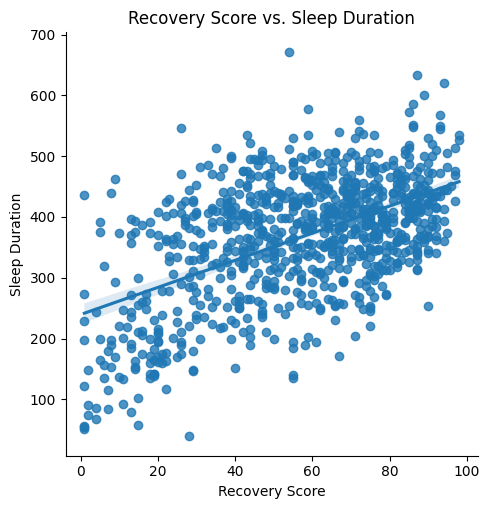

In [ ]:
#recovery score vs previous night sleep duration

sns.lmplot(x='recovery_score_percent', y='asleep_duration_min', data=physdf)
plt.title('Recovery Score vs. Sleep Duration')
plt.xlabel('Recovery Score')
plt.ylabel('Sleep Duration')
plt.show()

Insights:

Sleep duration and recovery score are positively correlated. More sleep generally leads to a better recovery.